In [11]:
import cv2
import skimage

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

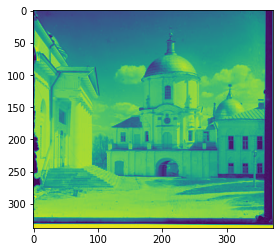

In [13]:
im1_file = './01112v.jpg'

img = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
img = img[5: -5, 10: -10]
shape = img.shape
div = shape[0]//3
window_len = 20


# print(img.shape)
im1 = np.array(img[0: div-15, 0:-15])
im3 = np.array(img[div:2*div])
im4 = np.array(img[2*div:])

# plt.imshow(img)
# plt.savefig("img.png")
plt.imshow(im1)
plt.savefig("img1.png")
plt.imshow(im3)
plt.savefig("img3.png")
plt.imshow(im4)
plt.savefig("img4.png")

# # h x w x 3. np.uint np.stack
# print(im1.shape) 

Part 1: Basic alignment

In [14]:
def ssd_score(im1, im2):
    return np.sum((im1 - im2)**2)

In [15]:
def ncc_score(im1, im2):
    return np.sum(((im1-np.mean(im1))/np.std(im1))*((im2-np.mean(im2))/ np.std(im2)))

(323, 358)
(323, 358)
(323, 358)
(3, 0, 338, 10)
(1, 0, 671, 10)
(323, 358, 3)


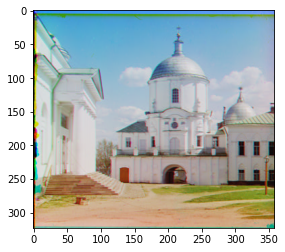

In [16]:
xrange = 14
yrange = 14
best_score1_2 = 0
best_score1_3 = 0
best_location1_2 = (0,0)
best_location1_3 = (0,0)
for i in range(xrange):
    for j in range(yrange):
        im2 = np.array(img[div + i: 2*div + i-15,  j: shape[1] - 15+ j])
        im3 = np.array(img[div*2 + i: 3*div+ i-15,  j : shape[1] - 15+ j])
    
        score1 = ncc_score(im1, im2)
        score2 = ncc_score(im1, im3)
        if score1 > best_score1_2:
            best_score1_2 = score1
            best_location1_2 = (i, j)
            best_im2 = im2
        if score2 > best_score1_3:
            best_score1_3 = score2
            best_location1_3 = (i, j)
            best_im3 = im3

print(im1.shape)
print(best_im2.shape)
print(best_im3.shape)



print(best_location1_2 + (div, 10))
print(best_location1_3+  (-5 + 2*div, 10))

# plt.imshow((im1+best_im3)/2)
# plt.savefig("test.png")

res = np.stack((best_im3,  best_im2, im1), axis = -1)
print(res.shape)
plt.imshow(res)
plt.savefig("res.jpeg")
skimage.io.imsave(im1_file + ".jpeg", res)

            

        



Extra: Bonus Points

/var/folders/2d/mqx8_d3j7sz1dwfnhtqnd3c00000gn/T/ipykernel_73461/233266786.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  if sum(img[height,col_index]) > 50 and abs(img[height,col_index,0] - img[height,col_index+1,0]) < 3 and abs(img[height,col_index,1] - img[height,col_index+1,1]) < 3 and abs(img[height,col_index,2] - img[height,col_index+1,2]) < 3:
/var/folders/2d/mqx8_d3j7sz1dwfnhtqnd3c00000gn/T/ipykernel_73461/233266786.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
  if sum(img[row_index,width]) > 50 and abs(img[row_index, width,0] - img[row_index + 1, width,0]) < 2 and abs(img[row_index, width,1] - img[row_index+ 1,width,1]) < 2 and abs(img[row_index, width,2] - img[row_index+ 1,width,2]) < 2:


16 12


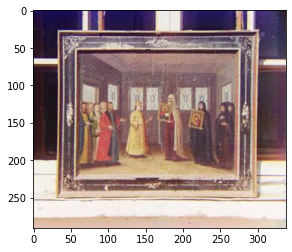

In [17]:
im1_file = './00149v.jpeg'

img = cv2.imread(im1_file)
shape = img.shape
height = shape[0]//2
width = shape[0]//2

row_index = 0
col_index = 0
row_index_d = shape[0] - 1
col_index_d = shape[1] - 1

# print(img[0:20, width])


while True:
    
    if sum(img[height,col_index]) > 50 and abs(img[height,col_index,0] - img[height,col_index+1,0]) < 3 and abs(img[height,col_index,1] - img[height,col_index+1,1]) < 3 and abs(img[height,col_index,2] - img[height,col_index+1,2]) < 3:
        break
    col_index += 1
while True:
    
    if sum(img[row_index,width]) > 50 and abs(img[row_index, width,0] - img[row_index + 1, width,0]) < 2 and abs(img[row_index, width,1] - img[row_index+ 1,width,1]) < 2 and abs(img[row_index, width,2] - img[row_index+ 1,width,2]) < 2:
        break
    row_index += 1
# while True:
#     if abs(img[height,col_index_d,0] - img[height,col_index_d-1,0]) < 3 and abs(img[height,col_index_d,1] - img[height,col_index_d-1,1]) < 3 and abs(img[height,col_index_d,2] - img[height,col_index_d-1,2]) < 3:
#         break
#     col_index_d -= 1
# while True:
#     if abs(img[row_index_d, width,0] - img[row_index_d - 1, width,0]) < 3 and abs(img[row_index_d, width,1] - img[row_index_d- 1,width,1]) < 3 and abs(img[row_index_d, width,2] - img[row_index_d-1,width,2]) < 3:
#         break
#     row_index -= 1


print(row_index, col_index)

new_img = img[row_index:-row_index, col_index: -col_index]
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
plt.imshow(new_img)
plt.savefig("new.jpeg")
skimage.io.imsave( 'new1.jpeg', new_img)



Part 2: Multiscale Alignment 

In [25]:
import time
from PIL import Image


img_file = 'data_hires/01657u.tif'

# img = cv2.imread(img_file)
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
# img = img[0:-, 0: -100]

shape = img.shape
print(shape)
height = shape[0]//3

im1 = img[105 : height - 207, 200 : -201]
im2 = img[height : 2 * height]
im3 = img[2 * height : 3 * height]

h, w = im1.shape


# plt.imshow(im1)
# plt.savefig("img1.png")
# plt.imshow(im2)
# plt.savefig("img2.png")
# plt.imshow(im3)
# plt.savefig("img3.png")

# plt.imshow(img)
# plt.savefig("img4.png")



(9637, 3761)


In [26]:
def fastAlign(im1, im2, k):
    if k > 0:
        x, y = fastAlign(im1[0::2, 0::2], im2[0::2, 0::2], k - 1)
    if k == 0: #search whole image
        h, w = im1.shape
        best_x, best_y = 0, 0
        best_score = np.inf
        
        for i in range(20):
            for j in range(20):
                im2_cpy = im2[i: h + i, j : w + j]
                im1_cpy = im1[:im2_cpy.shape[0], :im2_cpy.shape[1]]
                score = ssd_score(im1_cpy, im2_cpy)
                if score < best_score:
                    best_score = score
                    best_x, best_y = i, j
        print(best_x, best_y, h, w)
        return best_x, best_y
    else: #start search from x, y
        up_x, up_y = x * 2, y * 2
        
        h, w = im1.shape
        best_x, best_y = 0, 0
        best_score = np.inf
        # print(up_x, up_y)
        # print(im1.shape, im2.shape)
        for i in range(max(-up_x, -6), 6):
            for j in range(max(-up_y, -6), 6):
                im2_copy = im2[i + up_x: h + i + up_x, j+up_y : w + j+up_y]
                score = ssd_score(im1, im2_copy)
                if score < best_score:
                    best_score = score
                    best_x, best_y = i, j


        return up_x+best_x, up_y+best_y

In [27]:
start_time = time.time()


x2, y2 = fastAlign(im1, im2, 3)
x3, y3 = fastAlign(im1, im3, 3)

im2 = im2[x2 : x2 + h, y2 : y2 + w]
im3 = im3[x3 : x3 + h, y3 : y3 + w]

res = np.dstack((im3, im2, im1))

skimage.io.imsave("aaa.jpeg", res)



# your code
end_time = time.time()
total_time = end_time - start_time


print(total_time)

10 19 363 420
1 19 363 420
6.994042873382568
